In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve

# Read the CSV files
df1 = pd.read_csv('/Users/sudharmendragv/Downloads/Risk Assessment ML Project/inputdata/dataset1.csv')
df2 = pd.read_csv('/Users/sudharmendragv/Downloads/Risk Assessment ML Project/inputdata/dataset2.csv')

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Write the combined DataFrame to a new CSV file
combined_df.to_csv('combined.csv', index=False)


In [12]:
combined_df.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,nciw,100,1359,1,0
1,lsid,68,282,14,0
2,pwls,71,949,40,1
3,bqlx,686,3782,103,0
4,zmei,45,655,7,0


In [13]:
combined_df.tail()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
31,gudj,255,1687,2,0
32,wosl,0,18,21,1
33,xcvb,189,961,18,1
34,dfgh,16,1028,33,0
35,ngrd,9,45,1,1


In [14]:
combined_df.describe()

,lastmonth_activity,lastyear_activity,number_of_employees,exited
count,36.000000,36.000000,36.000000,36.000000
mean,169.388889,1310.972222,29.555556,0.611111
std,293.002124,1920.658049,33.142501,0.494413
min,0.000000,18.000000,1.000000,0.000000
25%,15.500000,363.000000,7.750000,0.000000
50%,73.000000,908.500000,16.000000,1.000000
75%,121.250000,1472.500000,36.250000,1.000000
max,1090.000000,10983.000000,103.000000,1.000000


In [15]:
combined_df.isnull().sum() # Checking the null values

corporation            0
lastmonth_activity     0
lastyear_activity      0
number_of_employees    0
exited                 0
dtype: int64

In [16]:
combined_df.info

<bound method DataFrame.info of    corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0         nciw                 100               1359                    1   
1         lsid                  68                282                   14   
2         pwls                  71                949                   40   
3         bqlx                 686               3782                  103   
4         zmei                  45                655                    7   
5         wosl                   0                 18                   21   
6         xcvb                 189                961                   18   
7         dfgh                  16               1028                   33   
8         ngrd                   9                 45                    1   
9         xful                   0                 67                   14   
10        kshe                  48                986                   22   
11        qqqq                  

In [17]:
for i in (combined_df.columns):
    print("{}:{}".format(i, combined_df[i].value_counts().shape[0])) # Printing the unique values for each columns

corporation:26
lastmonth_activity:24
lastyear_activity:26
number_of_employees:22
exited:2


In [18]:
combined_df.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'exited'],
      dtype='object')

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   corporation          36 non-null     object
 1   lastmonth_activity   36 non-null     int64 
 2   lastyear_activity    36 non-null     int64 
 3   number_of_employees  36 non-null     int64 
 4   exited               36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [20]:
combined_df.duplicated().sum()
combined_df = combined_df.drop_duplicates()
num_duplicates = np.sum(combined_df.duplicated())


In [21]:
print(f'Number of duplicates: {num_duplicates}')


Number of duplicates: 0


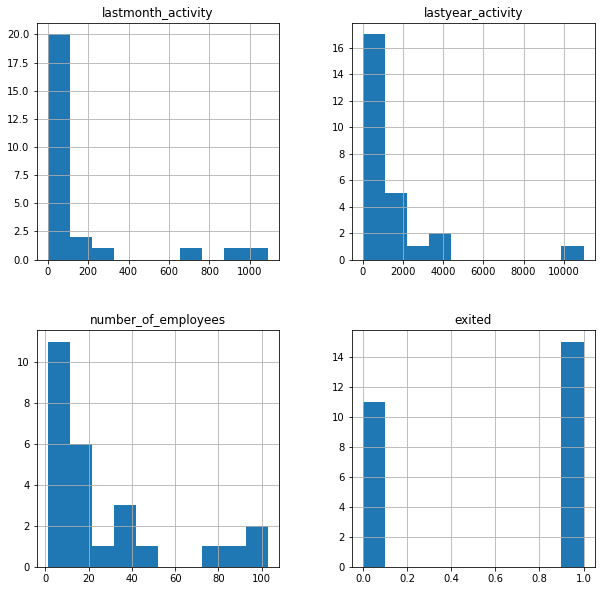

In [22]:
x = combined_df.hist(figsize = (10,10)) # Histogram of all the parameters

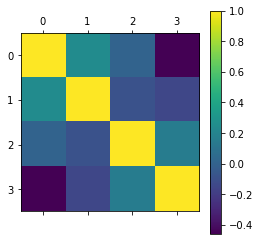

In [23]:
import scipy
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
# Correlation chart colorbar
plt.matshow(combined_df.corr())
plt.colorbar()
plt.show()

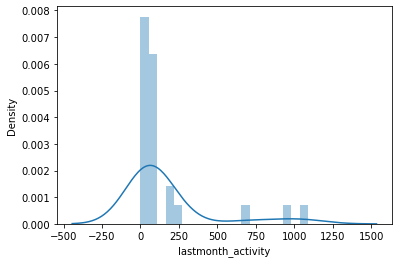

In [24]:
sns.distplot(a=combined_df["lastmonth_activity"]);

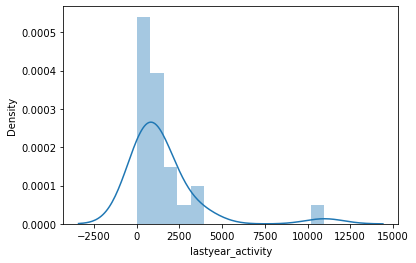

In [25]:
sns.distplot(a=combined_df["lastyear_activity"]);

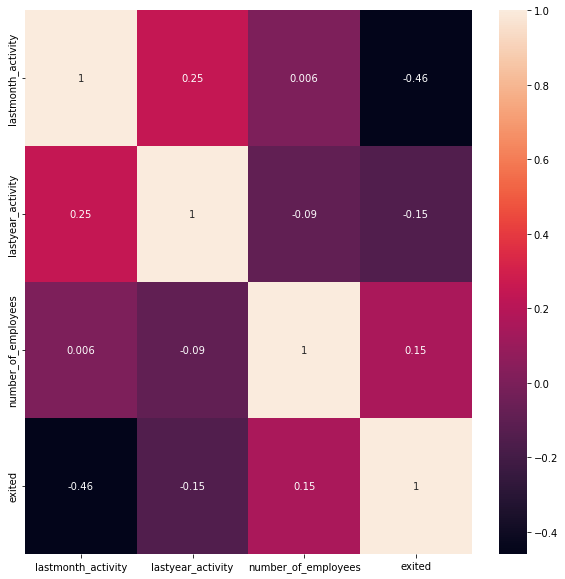

In [26]:
# Heatmap values for all the parameters
plt.figure(figsize=(10,10))
sns.heatmap(combined_df.corr(), annot=True);

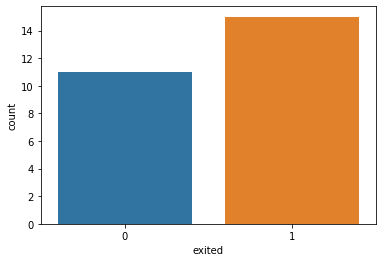

In [27]:
sns.countplot(x="exited", data=combined_df);

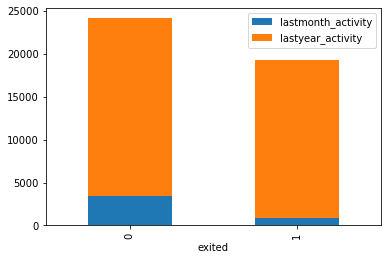

In [28]:
x = combined_df.filter(items=['lastmonth_activity', 'lastyear_activity', 'exited']).groupby(['exited']).sum()
x.plot.bar(stacked=True)
plt.show()

<AxesSubplot:xlabel='exited'>

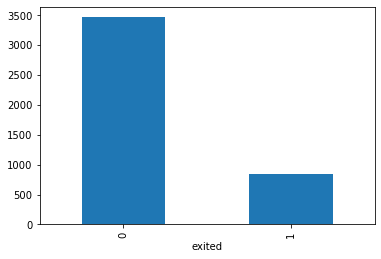

In [29]:
# Smoking with COPD
x = combined_df['lastmonth_activity'].groupby(combined_df['exited'])
x.sum().plot(kind='bar')

<AxesSubplot:xlabel='exited'>

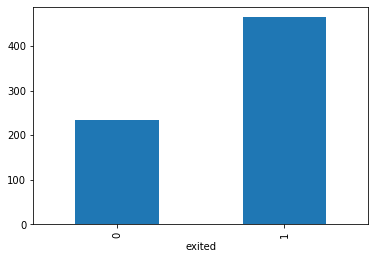

In [30]:
# Smoking with COPD
x = combined_df['number_of_employees'].groupby(combined_df['exited'])
x.sum().plot(kind='bar')

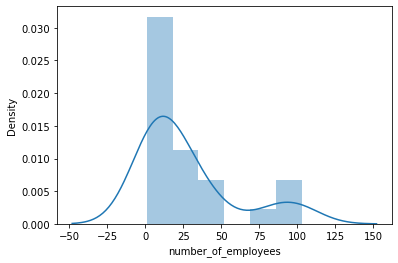

In [31]:
sns.distplot(a=combined_df["number_of_employees"]);

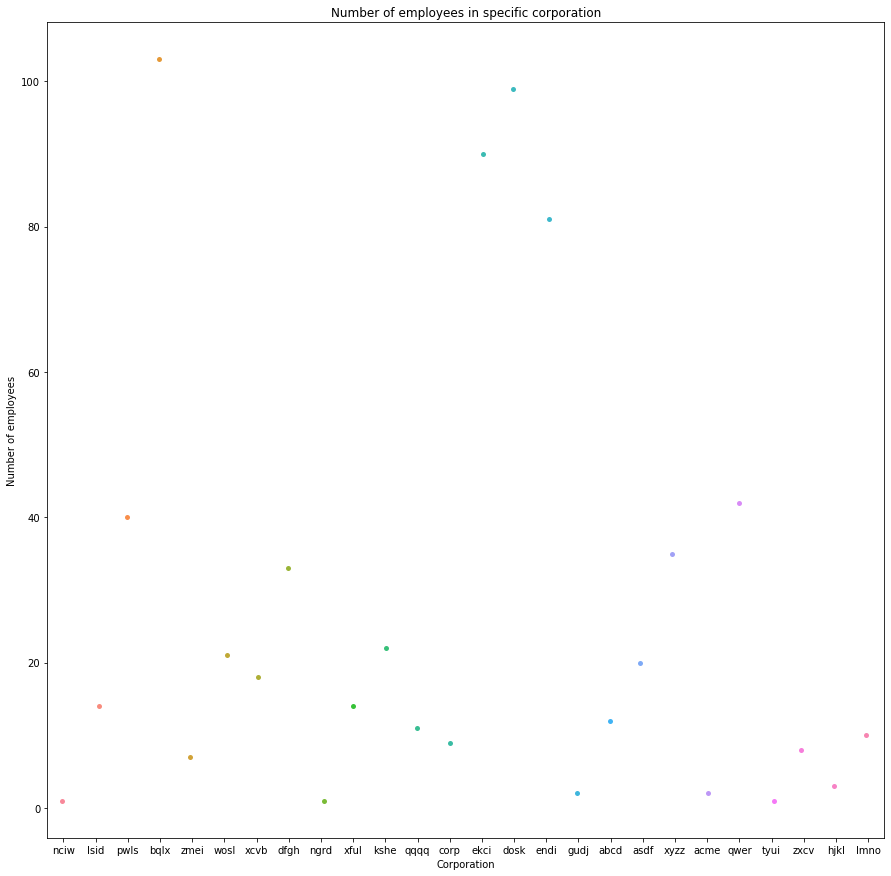

In [32]:
plt.figure(figsize=(15, 15))
sns.stripplot(data=combined_df, x='corporation', y='number_of_employees')
plt.title('Number of employees in specific corporation')
plt.xlabel('Corporation')
plt.ylabel('Number of employees')
plt.show()



In [33]:
combined_df.drop(['corporation'], axis=1, inplace=True) 

In [34]:
combined_df.columns

Index(['lastmonth_activity', 'lastyear_activity', 'number_of_employees',
       'exited'],
      dtype='object')

In [35]:
# Dropping specific columns for further modeling
combined_df1= combined_df.copy()
combined_df1.head(10)
print(combined_df1)

X=combined_df1.pop('exited')
Y= combined_df1
print (Y.shape)
print (X.shape)

    lastmonth_activity  lastyear_activity  number_of_employees  exited
0                  100               1359                    1       0
1                   68                282                   14       0
2                   71                949                   40       1
3                  686               3782                  103       0
4                   45                655                    7       0
5                    0                 18                   21       1
6                  189                961                   18       1
7                   16               1028                   33       0
8                    9                 45                    1       1
9                    0                 67                   14       1
10                  48                986                   22       1
11                  52                650                   11       1
12                1090               2452                    9       0
13    

In [132]:
# Splitting the dataset as Train and Test data. train a logistic regression model on this dataset, 
# predict the target variable for the test set, and print the coefficients of the trained model.
X_train,X_test,y_train,y_test = train_test_split(Y,X,test_size=0.3,random_state=100)
trained_model = LogisticRegression(solver='liblinear')
trained_model.fit(X_train,y_train)
print ('Printing the co-efficients :', trained_model.coef_)

y_prediction = trained_model.predict(X_test)
y_prediction_probability = trained_model.predict_proba(X_test)

Printing the co-efficients : [[-0.00709661  0.00018846  0.02508652]]


f1-score:  0.8589743589743589
Recall:  0.875
Precision:  0.8928571428571428
Accuracy:  0.875
Confusion-Matrix :
  [[1 1]
 [0 6]]


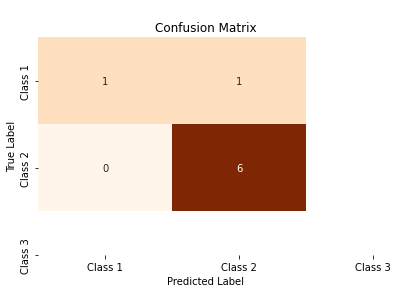

In [133]:
# Using sklearn-metrics the values of f1 socre, Recall, Precision and Acuracy are prined below. 
# The accuracy obtained is 90%
from sklearn import metrics

print("f1-score: ",metrics.f1_score(y_test,y_prediction, average='weighted'))
print("Recall: ",metrics.recall_score(y_test,y_prediction, average='weighted'))
print("Precision: ",metrics.precision_score(y_test,y_prediction, average='weighted'))
print("Accuracy: ",metrics.accuracy_score(y_test,y_prediction))
print("Confusion-Matrix :\n ", metrics.confusion_matrix(y_test,y_prediction))


import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_prediction)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', cbar=False, 
            xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('\nConfusion Matrix')
plt.show()


In [311]:
# training a linear support vector machine (SVM) model on this dataset using scikit-learn's 
# LinearSVC class with a specific tolerance value and regularization parameter.
from sklearn.svm import LinearSVC

support_vector = LinearSVC(tol=1e-3, C=3)
support_vector.fit(X_train, y_train)


LinearSVC(C=3, tol=0.001)

Train score: 0.5555555555555556
Test score: 0.75


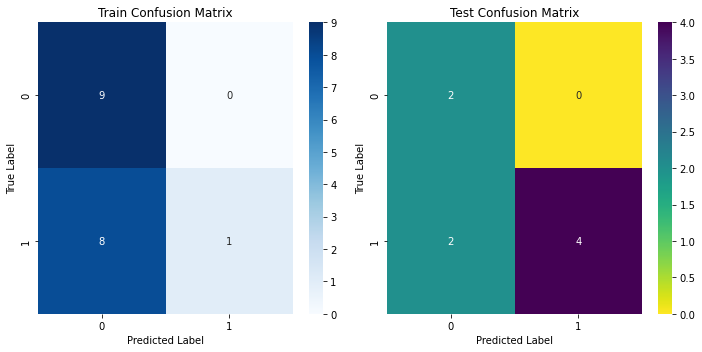

In [312]:
# Printing the Train and Test score values.
print(f"Train score: {support_vector.score(X_train, y_train)}")
print(f"Test score: {support_vector.score(X_test, y_test)}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_train_pred = support_vector.predict(X_train)
y_test_pred = support_vector.predict(X_test)

# Compute confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices as heatmaps for both Train and Test
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
sns.heatmap(test_cm, annot=True, fmt='d', cmap='viridis_r', ax=ax[1])
ax[0].set_title('Train Confusion Matrix')
ax[1].set_title('Test Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[1].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')
ax[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()



In [187]:
# training a decision tree classifier model on this dataset using scikit-learn's DecisionTreeClassifier class 
# with a specific maximum depth and maximum leaf nodes.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)

Train score: 0.9444444444444444
Test score: 0.875


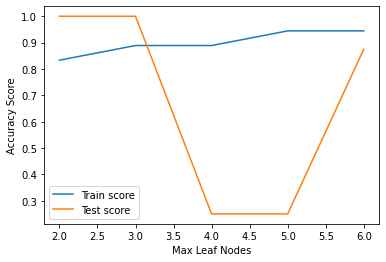

In [188]:
# Train and Test accuracy
print(f"Train score: {tree.score(X_train, y_train)}")
print(f"Test score: {tree.score(X_test, y_test)}")

# Plotting the graph to analyze test, train score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
max_leaf_nodes = [2, 3, 4, 5, 6]

for leaf_nodes in max_leaf_nodes:
    tree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=leaf_nodes)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.plot(max_leaf_nodes, train_scores, label="Train score")
plt.plot(max_leaf_nodes, test_scores, label="Test score")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()



In [193]:
# training a Random Forest classifier model on this dataset using scikit-learn's RandomForestClassifier class 
# with a specific maximum depth and maximum leaf nodes.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2, max_leaf_nodes=7)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=7)

Train score: 0.8888888888888888
Test score: 0.875


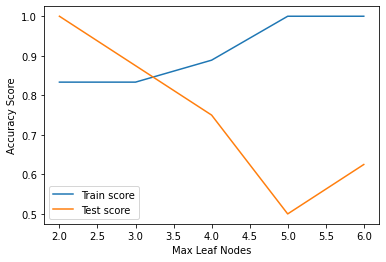

In [194]:
# Printing the Train, Test accuracy scores
print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

# Plotting the graph to analyze test, train score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
max_leaf_nodes = [2, 3, 4, 5, 6]

for leaf_nodes in max_leaf_nodes:
    forest = RandomForestClassifier(max_depth=3, max_leaf_nodes=leaf_nodes)
    forest.fit(X_train, y_train)
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

plt.plot(max_leaf_nodes, train_scores, label="Train score")
plt.plot(max_leaf_nodes, test_scores, label="Test score")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


In [313]:
import pickle
with open('model_pickle_employee', 'wb') as f:
    pickle.dump(tree,f)
    